In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.append(r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis")

from artifical_data import reaction1_synthetic_data
from monte_carlo_estimator import monte_carlo_parameter_estimation
from plotter import print_monte_carlo_info, corner_plot_monte_carlo_results, correlation_matrix_plot, compare_error_ellipses
from data_handler import save_results
from noise_function_libary import no_noise, add_noise_plate_reader, add_noise_processed_data,add_noise_rate
import os
import pandas as pd

In [2]:
# experimental data
EXPERIMENTAL_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\experimental_data"

# processed data
PROCESSED_DATA_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\processed_data"

# results path
RESULTS_PATH = r"C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\\example_reactions\\dortmund_system\\results"

In [3]:
 # define model
    
parameters = ['Vmax', 'Km1', 'Km2']
substrates = ["NADH_mM"]

def michaelis_menten_inhibition_NADH(S, *parameters):
    S1 = S
    Vmax, Km1, Km2 = parameters

    return (Vmax * S1 *300) / ((Km1 + 300) * (Km2 + S1))

In [4]:
 # Perform Monte Carlo parameter estimation with experimental data

data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "Reaction2", "r_2_HP_NADH_PD.csv"))
cal_data = pd.read_csv(os.path.join(EXPERIMENTAL_DATA_PATH, "NADH_Kalibriergerade.csv"))

cal_parameters = {
    "Vf_well": 10.0,  # mL
    "Vf_prod": 5.0,  # mL
    "c_prod": 2.15    # mg/mL
}

initial_guess = [2.6,111,3]
noise_level = 0.03
num_iterations = 500


In [ ]:
mc_reaction2_noisy_plate_reader = monte_carlo_parameter_estimation(data, 
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition_NADH, add_noise_plate_reader, 
                                                            initial_guess, noise_level, estimate_method="multi_start", num_iterations=num_iterations)


df_reaction2_noisy_plate_reader = save_results(mc_reaction2_noisy_plate_reader, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction2_NADH_noisy_plate_reader_results.csv"))

Monte Carlo Parameter Estimation Results:
Vmax: 1.1994741487907195 ± 0.22609416907662003
Km1: 214.032729613656 ± 84.59387575040915
Km2: 0.6396909749068556 ± 0.16646209670145856

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2']
 ['Vmax' 1.0 0.6472157027657198 0.5773193004177178]
 ['Km1' 0.6472157027657198 1.0 -0.2257228154417834]
 ['Km2' 0.5773193004177178 -0.2257228154417834 1.0]]


C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


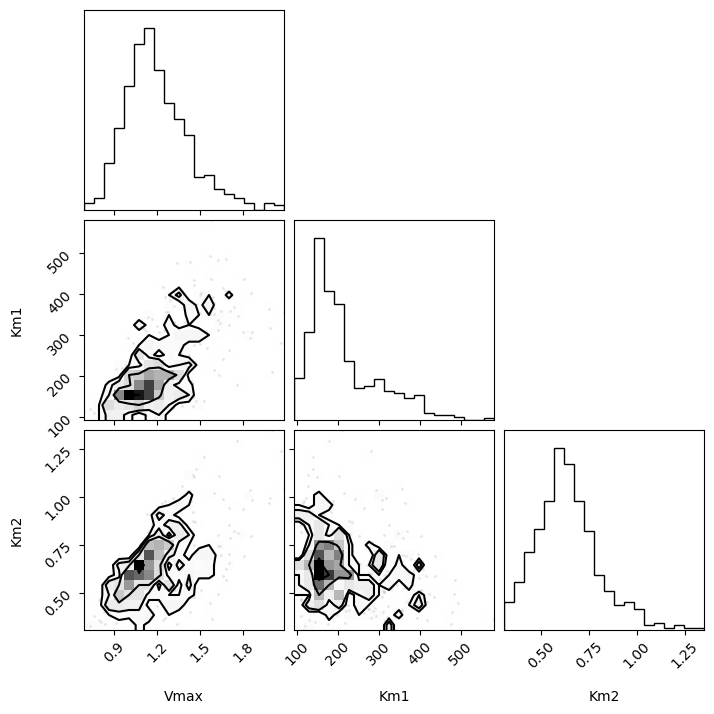

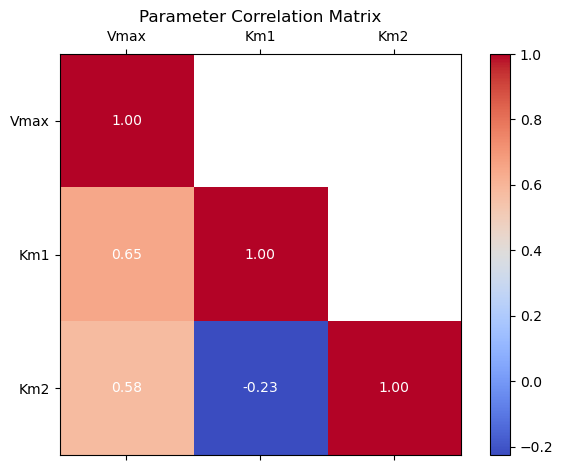

In [ ]:
print_monte_carlo_info(parameters, df_reaction2_noisy_plate_reader)
corner_plot_monte_carlo_results(df_reaction2_noisy_plate_reader,parameters)
correlation_matrix_plot(df_reaction2_noisy_plate_reader,parameters)

In [ ]:
# Perform Monte Carlo parameter estimation with experimental data
mc_reaction1_noisy_rates = monte_carlo_parameter_estimation(data,
                                                            cal_data, substrates, cal_parameters,
                                                            michaelis_menten_inhibition_NADH, add_noise_rate,
                                                            initial_guess, noise_level, estimate_method="multi_start",num_iterations=num_iterations)


df_reaction1_noisy_rates = save_results(mc_reaction1_noisy_rates, parameters, save_path=os.path.join(RESULTS_PATH, "experimental_reaction2_NADH_noisy_noisey_rate.csv"))

C:\\Users\\berger\\Documents\\Projekts\\enzyme-cascade-analysis\plotter.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{param}: {param_means[i]} ± {param_stds[i]}")


Monte Carlo Parameter Estimation Results:
Vmax: 6.724255619676087 ± 55.562626275665586
Km1: 186.74549369246571 ± 91.33087469502624
Km2: 9.341742906696789 ± 89.06394477824622

Parameter Correlation Matrix:
[['' 'Vmax' 'Km1' 'Km2']
 ['Vmax' 1.0 -0.18842653097474768 0.9979102573750074]
 ['Km1' -0.18842653097474768 1.0 -0.19071836291851724]
 ['Km2' 0.9979102573750074 -0.19071836291851724 1.0]]


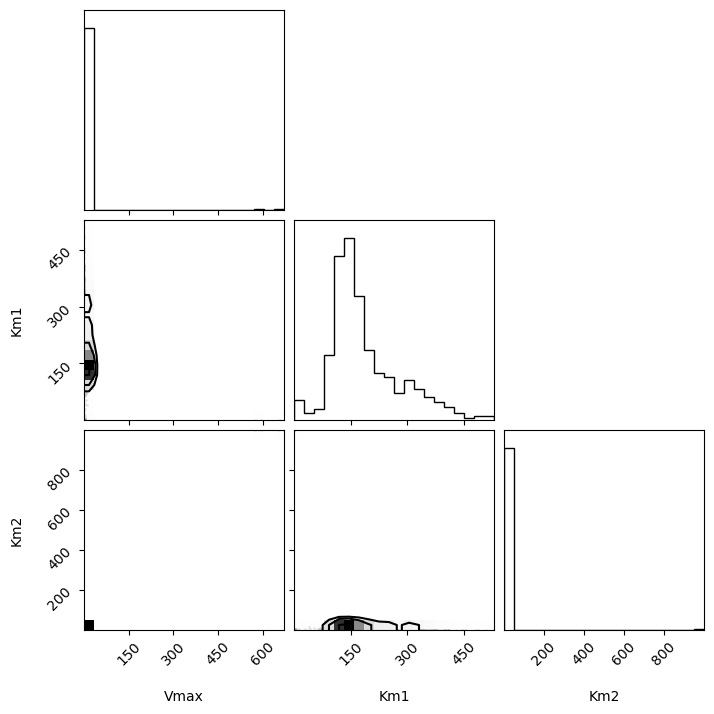

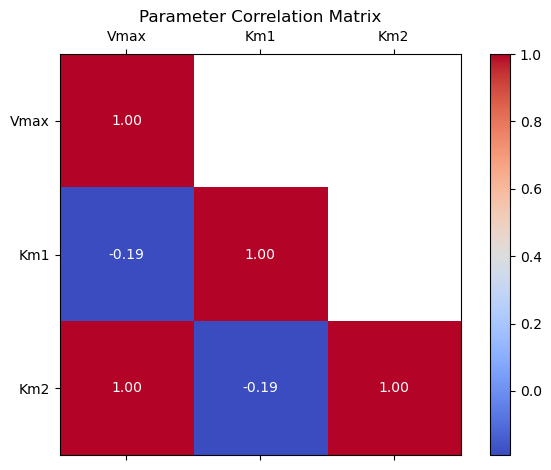

In [ ]:
print_monte_carlo_info(parameters, df_reaction1_noisy_rates)
corner_plot_monte_carlo_results(df_reaction1_noisy_rates,parameters)
correlation_matrix_plot(df_reaction1_noisy_rates,parameters)

In [ ]:
compare_error_ellipses(
    df_reaction2_noisy_plate_reader, df_reaction1_noisy_rates, parameters=["Km1", "Vmax"])

In [ ]:
compare_error_ellipses(
    df_reaction2_noisy_plate_reader, df_reaction1_noisy_rates, parameters=["Km2", "Vmax"])